In [1]:
#code is runnable

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
 
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import  train_test_split
 
import tensorflow as tf
from tensorflow.keras import regularizers
import pandas as pd
from random import seed
from random import random

In [3]:
import pandas as pd
data = pd.read_excel('crude oil dataset/LR-1.xlsx')
#data.drop(data.columns[[2]], axis=1, inplace=True)
data = data.set_index('DATE')

In [4]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [5]:
values = data.values
values = values.astype('float32')
print(values)

[[46.82]
 [44.87]
 [45.64]
 ...
 [72.09]
 [70.41]
 [70.51]]


In [6]:
ab= series_to_supervised(values,3,1)
ab.columns

Index(['var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'var1(t)'], dtype='object')

In [7]:
scaler = MinMaxScaler(feature_range=(0.001,0.005))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled,3,1)

reframed.tail()


,var1(t-3),var1(t-2),var1(t-1),var1(t)
1296,0.004735,0.004760,0.004759,0.004831
1297,0.004760,0.004759,0.004831,0.004835
1298,0.004759,0.004831,0.004835,0.004814
1299,0.004831,0.004835,0.004814,0.004755
1300,0.004835,0.004814,0.004755,0.004759


In [8]:
values = reframed.values
n_train = 1000
train = values[:n_train]
test = values[n_train:]
trainX,trainY = train[:,:-1],train[:,-1]
testX,testY = test[:,:-1],test[:,-1]


In [9]:
trainX = trainX.reshape(trainX.shape[0],1,trainX.shape[1])
testX = testX.reshape(testX.shape[0],1,testX.shape[1])

In [10]:
print(trainX.shape)
print(testX.shape)

(1000, 1, 3)
(298, 1, 3)


In [11]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(3, activation='sigmoid',input_shape=(trainX.shape[1],trainX.shape[2])),
#tf.keras.layers.Dense(3, activation='relu'),
tf.keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 3)              12        
                                                                 
 dense_1 (Dense)             (None, 1, 1)              4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history = model.fit(trainX,trainY, validation_data=(testX,testY), epochs=200, verbose=2)

Epoch 1/200
32/32 - 1s - loss: 1.4335 - val_loss: 0.8982 - 795ms/epoch - 25ms/step
Epoch 2/200
32/32 - 0s - loss: 0.6021 - val_loss: 0.3524 - 55ms/epoch - 2ms/step
Epoch 3/200
32/32 - 0s - loss: 0.2274 - val_loss: 0.1256 - 54ms/epoch - 2ms/step
Epoch 4/200
32/32 - 0s - loss: 0.0778 - val_loss: 0.0401 - 53ms/epoch - 2ms/step
Epoch 5/200
32/32 - 0s - loss: 0.0237 - val_loss: 0.0113 - 54ms/epoch - 2ms/step
Epoch 6/200
32/32 - 0s - loss: 0.0063 - val_loss: 0.0027 - 55ms/epoch - 2ms/step
Epoch 7/200
32/32 - 0s - loss: 0.0015 - val_loss: 5.7042e-04 - 56ms/epoch - 2ms/step
Epoch 8/200
32/32 - 0s - loss: 2.8372e-04 - val_loss: 9.9653e-05 - 62ms/epoch - 2ms/step
Epoch 9/200
32/32 - 0s - loss: 4.6351e-05 - val_loss: 1.4542e-05 - 63ms/epoch - 2ms/step
Epoch 10/200
32/32 - 0s - loss: 6.3405e-06 - val_loss: 1.8360e-06 - 58ms/epoch - 2ms/step
Epoch 11/200
32/32 - 0s - loss: 8.3372e-07 - val_loss: 2.7202e-07 - 62ms/epoch - 2ms/step
Epoch 12/200
32/32 - 0s - loss: 2.3165e-07 - val_loss: 1.0537e-07 - 5

Epoch 93/200
32/32 - 0s - loss: 1.7733e-07 - val_loss: 8.6856e-08 - 47ms/epoch - 1ms/step
Epoch 94/200
32/32 - 0s - loss: 1.7735e-07 - val_loss: 8.6100e-08 - 48ms/epoch - 1ms/step
Epoch 95/200
32/32 - 0s - loss: 1.7511e-07 - val_loss: 8.6624e-08 - 45ms/epoch - 1ms/step
Epoch 96/200
32/32 - 0s - loss: 1.7613e-07 - val_loss: 8.6182e-08 - 49ms/epoch - 2ms/step
Epoch 97/200
32/32 - 0s - loss: 1.7738e-07 - val_loss: 8.7338e-08 - 48ms/epoch - 1ms/step
Epoch 98/200
32/32 - 0s - loss: 1.7607e-07 - val_loss: 8.6409e-08 - 47ms/epoch - 1ms/step
Epoch 99/200
32/32 - 0s - loss: 1.7511e-07 - val_loss: 8.7065e-08 - 47ms/epoch - 1ms/step
Epoch 100/200
32/32 - 0s - loss: 1.7736e-07 - val_loss: 8.8221e-08 - 48ms/epoch - 2ms/step
Epoch 101/200
32/32 - 0s - loss: 1.7533e-07 - val_loss: 8.4819e-08 - 43ms/epoch - 1ms/step
Epoch 102/200
32/32 - 0s - loss: 1.7729e-07 - val_loss: 8.6933e-08 - 46ms/epoch - 1ms/step
Epoch 103/200
32/32 - 0s - loss: 1.7641e-07 - val_loss: 8.5419e-08 - 46ms/epoch - 1ms/step
Epoch 

32/32 - 0s - loss: 1.7705e-07 - val_loss: 8.8332e-08 - 48ms/epoch - 2ms/step
Epoch 184/200
32/32 - 0s - loss: 1.7718e-07 - val_loss: 9.2833e-08 - 44ms/epoch - 1ms/step
Epoch 185/200
32/32 - 0s - loss: 1.7647e-07 - val_loss: 8.8419e-08 - 45ms/epoch - 1ms/step
Epoch 186/200
32/32 - 0s - loss: 1.7695e-07 - val_loss: 8.9511e-08 - 46ms/epoch - 1ms/step
Epoch 187/200
32/32 - 0s - loss: 1.7697e-07 - val_loss: 8.7495e-08 - 46ms/epoch - 1ms/step
Epoch 188/200
32/32 - 0s - loss: 1.7785e-07 - val_loss: 8.7769e-08 - 46ms/epoch - 1ms/step
Epoch 189/200
32/32 - 0s - loss: 1.7630e-07 - val_loss: 8.6643e-08 - 46ms/epoch - 1ms/step
Epoch 190/200
32/32 - 0s - loss: 1.7701e-07 - val_loss: 8.6205e-08 - 45ms/epoch - 1ms/step
Epoch 191/200
32/32 - 0s - loss: 1.7887e-07 - val_loss: 8.6931e-08 - 46ms/epoch - 1ms/step
Epoch 192/200
32/32 - 0s - loss: 1.7712e-07 - val_loss: 8.5371e-08 - 45ms/epoch - 1ms/step
Epoch 193/200
32/32 - 0s - loss: 1.7616e-07 - val_loss: 8.8133e-08 - 46ms/epoch - 1ms/step
Epoch 194/200

In [13]:
predicted = model.predict(testX)

In [14]:

testXRe = testX.reshape(testX.shape[0],testX.shape[2])
predicted = predicted.reshape(-1,1)

In [15]:
predicted = np.concatenate((predicted,testXRe[:,1:]),axis=1)

In [16]:
predicted = scaler.inverse_transform(predicted)

In [17]:
testY = testY.reshape(len(testY),1)

In [18]:
testY = np.concatenate((testY,testXRe[:,1:]),axis=1)

In [19]:
testY = scaler.inverse_transform(testY)

In [20]:
mean_predicted = np.mean(predicted[:,0])
mean_test = np.mean(testY[:,0])
print("MAE is: ",mean_absolute_error(testY[:,0],predicted[:,0]))
print("RMSE is: ",np.sqrt(mean_squared_error(testY[:,0],predicted[:,0])))
print(mean_test,mean_predicted)

MAE is:  7.509533
RMSE is:  8.192903
55.70795 55.23912


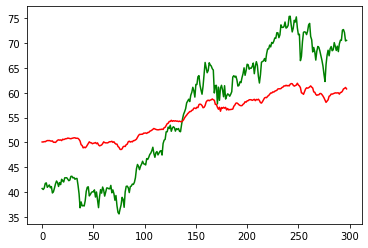

In [21]:
plt.plot(testY[:,0],'g', predicted[:,0], 'r')